In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.Series(data.target, name='MedHouseVal')

# Select four or more numerical features
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


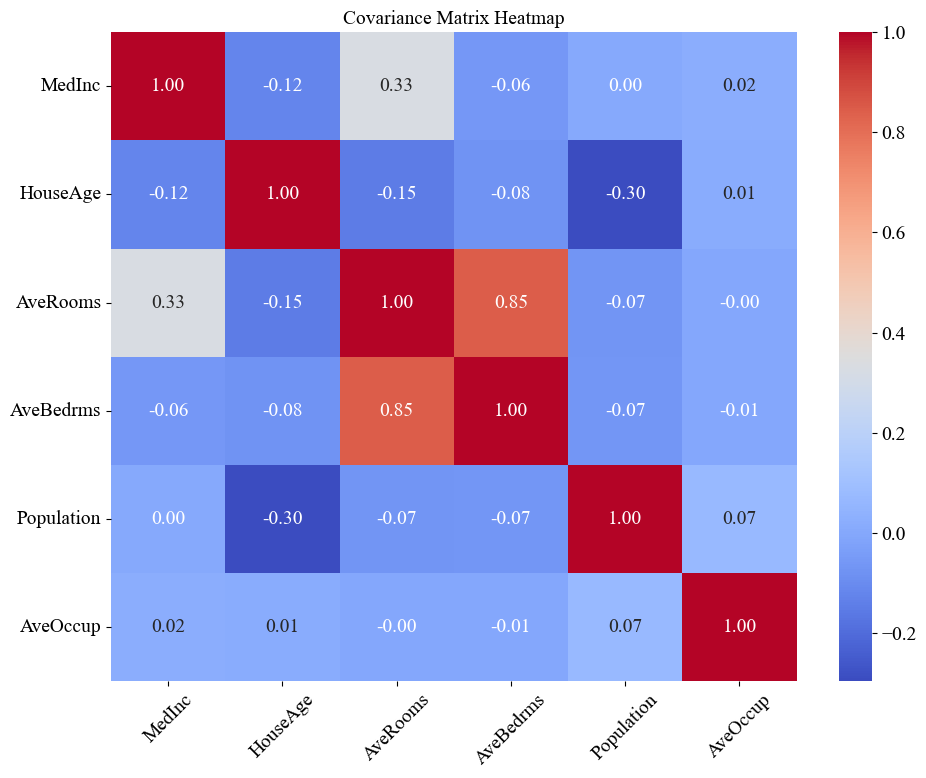

In [15]:
# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Visualize the covariance matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=features, yticklabels=features)
plt.title('Covariance Matrix Heatmap', fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=14, fontname='Times New Roman', rotation=45)
plt.yticks(fontsize=14, fontname='Times New Roman', rotation=0)
plt.tight_layout()
plt.show()


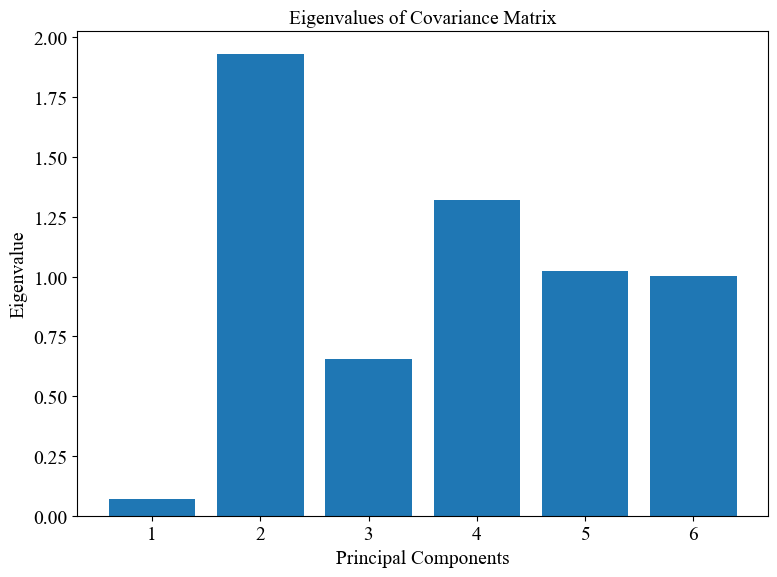

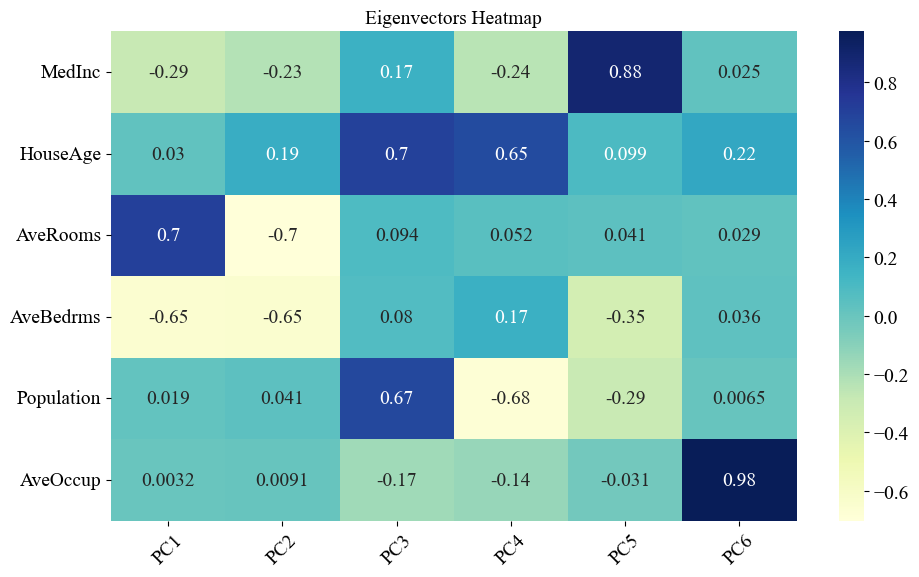

In [16]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Visualize eigenvalues as bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues)+1), eigenvalues)
plt.xlabel('Principal Components', fontsize=14, fontname='Times New Roman')
plt.ylabel('Eigenvalue', fontsize=14, fontname='Times New Roman')
plt.title('Eigenvalues of Covariance Matrix', fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=14, fontname='Times New Roman')
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.tight_layout()
plt.show()

# Display eigenvectors as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(eigenvectors, annot=True, cmap="YlGnBu", xticklabels=[f"PC{i+1}" for i in range(len(features))], yticklabels=features)
plt.title('Eigenvectors Heatmap', fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=14, fontname='Times New Roman', rotation=45)
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.tight_layout()
plt.show()


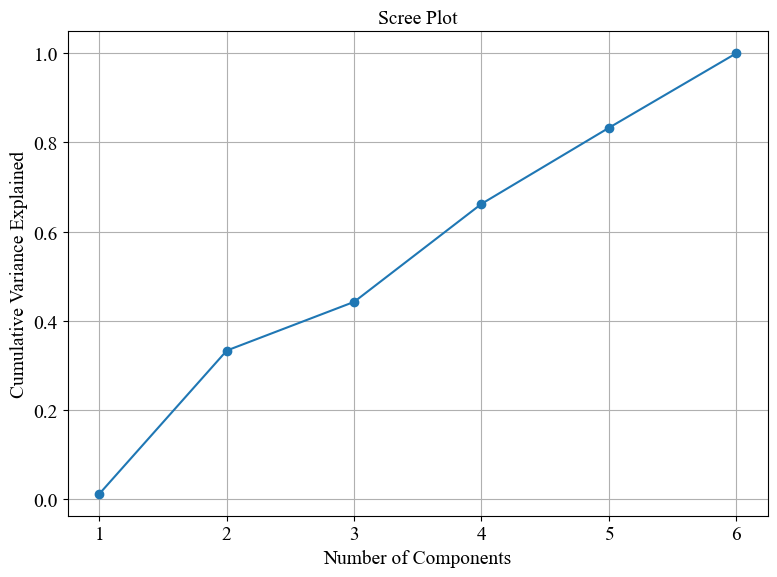

In [17]:
# PCA Projection
X_pca = X_scaled.dot(eigenvectors)

# Scree plot - cumulative variance explained
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components', fontsize=14, fontname='Times New Roman')
plt.ylabel('Cumulative Variance Explained', fontsize=14, fontname='Times New Roman')
plt.title('Scree Plot', fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=14, fontname='Times New Roman')
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.grid(True)
plt.tight_layout()
plt.show()


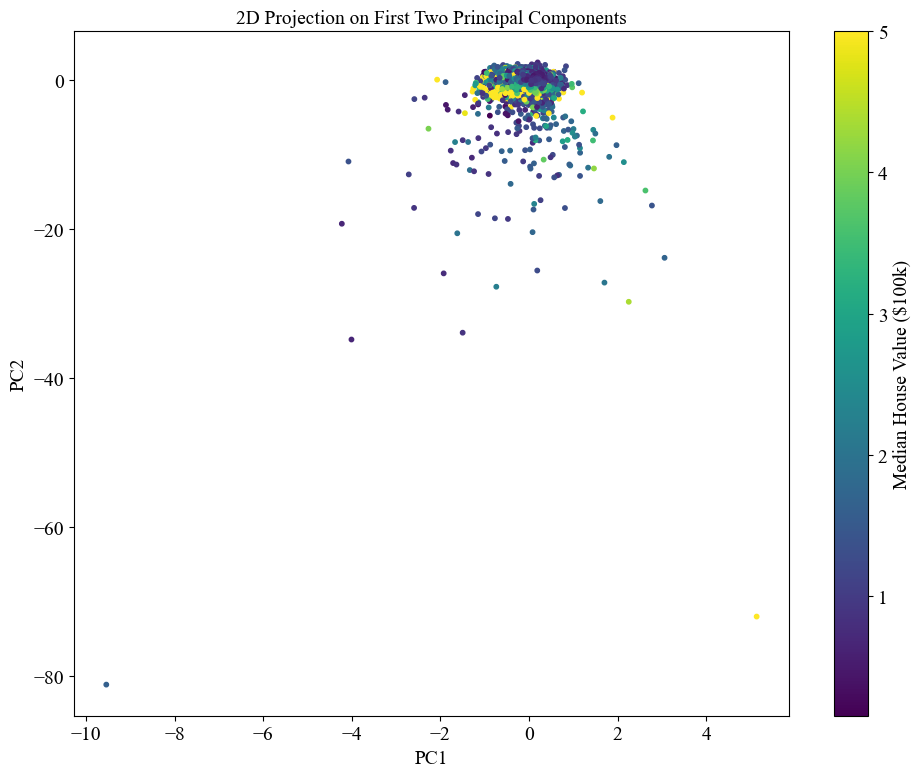

In [18]:
# 2D scatterplot on first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='viridis', s=10)
cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value ($100k)', fontsize=14, fontname='Times New Roman')
plt.xlabel('PC1', fontsize=14, fontname='Times New Roman')
plt.ylabel('PC2', fontsize=14, fontname='Times New Roman')
plt.title('2D Projection on First Two Principal Components', fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=14, fontname='Times New Roman')
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.tight_layout()
plt.show()


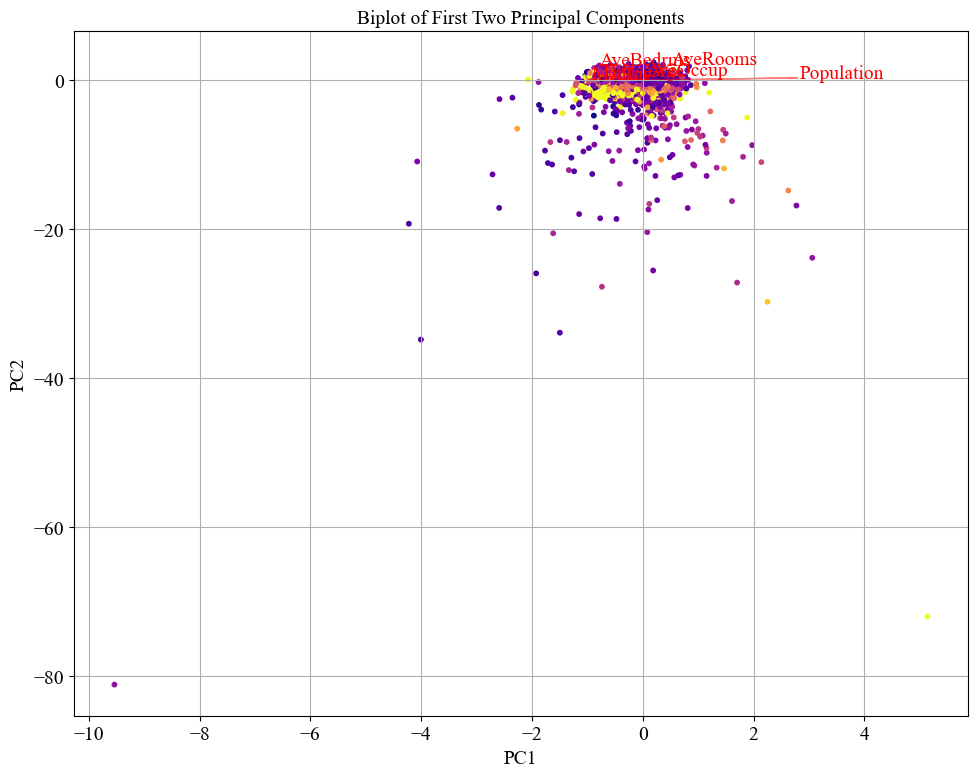

In [19]:
# Biplot with original feature vectors
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='plasma', s=10)

for i, feature in enumerate(features):
    plt.arrow(0, 0, eigenvectors[0, i]*3, eigenvectors[1, i]*3,
              color='r', alpha=0.5, head_width=0.1)
    plt.text(eigenvectors[0, i]*3.2, eigenvectors[1, i]*3.2,
             feature, color='r', fontsize=14, fontname='Times New Roman')

plt.xlabel('PC1', fontsize=14, fontname='Times New Roman')
plt.ylabel('PC2', fontsize=14, fontname='Times New Roman')
plt.title('Biplot of First Two Principal Components', fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=14, fontname='Times New Roman')
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.grid(True)
plt.tight_layout()
plt.show()


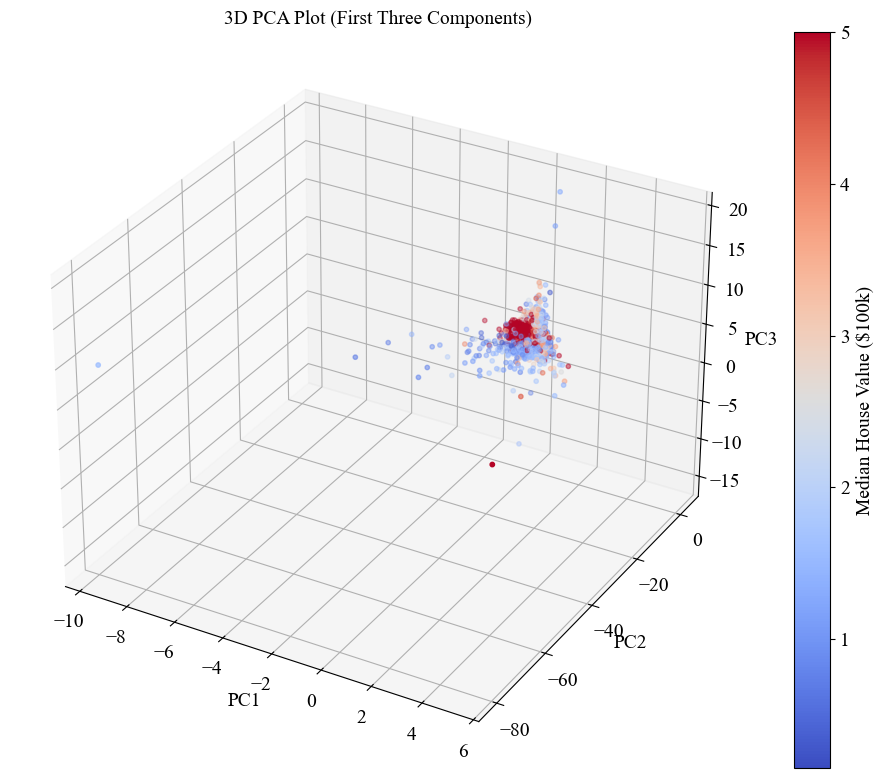

In [20]:
# 3D PCA plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=target, cmap='coolwarm', s=10)
fig.colorbar(scatter, label='Median House Value ($100k)')

ax.set_xlabel('PC1', fontsize=14, fontname='Times New Roman')
ax.set_ylabel('PC2', fontsize=14, fontname='Times New Roman')
ax.set_zlabel('PC3', fontsize=14, fontname='Times New Roman')
ax.set_title('3D PCA Plot (First Three Components)', fontsize=14, fontname='Times New Roman')
plt.tight_layout()
plt.show()
